# Adagrad algorithm implementation
#### Name : Salai Vinoth SA
#### Reg No : 120003264
#### Roll No : F-8

# Imports

In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Generating Data

In [2]:
np.random.seed(0)
n_samples = 50
X = np.linspace(1, 50, n_samples)
Y = 10*X + 6 + 2*np.random.randn(n_samples)

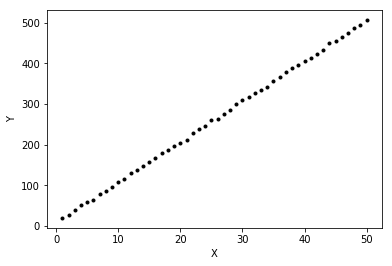

In [3]:
plt.plot(X, Y, 'k.')
plt.xlabel("X")
plt.ylabel("Y");

# Cost Function

In [4]:
def cost(param_list):
    w, b = param_list
    pred = w*X+b
    return np.sqrt(((pred - Y) ** 2).mean(axis=None))/(2*len(Y))

In [5]:
# Cost of w=0, b=0
w, b = 0., 0.
print("Cost at w={}, b={} is: {}".format(w, b, cost([w, b])))

# Cost of w=10, b=4. Should be lower than w=0, b=0
w, b = 10., 4.
print("Cost at w={}, b={} is: {}".format(w, b, cost([w, b])))

# Computing the gradient at w=0, b=0
from autograd import grad
grad_cost =grad(cost)
w, b = 0., 0.
print("Gradient at w={}, b={} is: {}".format(w, b, grad_cost([w, b])))

# Computing the gradient at w=10, b=4. We would expect it to be smaller than at 0, 0
w, b = 10., 4.
print("Gradient at w={}, b={} is: {}".format(w, b, grad_cost([w, b])))

Cost at w=0.0, b=0.0 is: 2.9809044649485408
Cost at w=10.0, b=4.0 is: 0.03204794719387623
Gradient at w=0.0, b=0.0 is: [array(-0.29297047), array(-0.00876516)]
Gradient at w=10.0, b=4.0 is: [array(-0.14406455), array(-0.00711783)]


# Adagrad algorithm

In [6]:
def adagrad_gd(param_init, cost, niter=5, lr=1e-2, eps=1e-8, random_seed=0):
    """
    param_init: List of initial values of parameters
    cost: cost function
    niter: Number of iterations to run
    lr: Learning rate
    eps: Fudge factor, to avoid division by zero
    """
    from copy import deepcopy
    import math
    # Fixing the random_seed
    np.random.seed(random_seed)
    
    # Function to compute the gradient of the cost function
    grad_cost = grad(cost)
    params = deepcopy(param_init)
    param_array, grad_array, lr_array, cost_array = [params], [], [[lr for _ in params]], [cost(params)]
    # Initialising sum of squares of gradients for each param as 0
    sum_squares_gradients = [np.zeros_like(param) for param in params]
    for i in range(niter):
        out_params = []
        gradients = grad_cost(params)
        # At each iteration, we add the square of the gradients to `sum_squares_gradients`
        sum_squares_gradients= [eps + sum_prev + np.square(g) for sum_prev, g in zip(sum_squares_gradients, gradients)]
        # Adapted learning rate for parameter list
        lrs = [np.divide(lr, np.sqrt(sg)) for sg in sum_squares_gradients]
        # Paramter update
        params = [param-(adapted_lr*grad_param) for param, adapted_lr, grad_param in zip(params, lrs, gradients)]
        param_array.append(params)
        lr_array.append(lrs)
        grad_array.append(gradients)
        cost_array.append(cost(params))
        
    return params, param_array, grad_array, lr_array, cost_array

# Experiment

In [7]:
# Fixing the random seed for reproducible init params for `W` and `b`
np.random.seed(0)
param_init = [np.random.randn(), np.random.randn()]
lr = 0.01
eps=1e-8
niter=1000
ada_params, ada_param_array, ada_grad_array, ada_lr_array, ada_cost_array = adagrad_gd(param_init, cost, niter=niter, lr=lr, eps=eps)

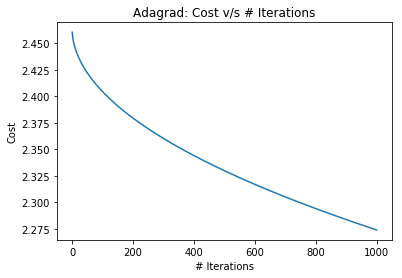

In [8]:
pd.Series(ada_cost_array, name='Cost').plot(title='Adagrad: Cost v/s # Iterations')
plt.ylabel("Cost")
plt.xlabel("# Iterations");

In [9]:
print("After {} iterations, learnt `W` = {} and learnt `b` = {}".format(niter, *ada_params))

After 1000 iterations, learnt `W` = 2.382061945262103 and learnt `b` = 1.0181187887311143
